#Week 2 Exercises

In this weeks exercises you will use Numpy/Scipy to impliment some numerical algorithms and then you will use Pandas to perform a rudamentary data analysis using the KDD 98 dataset.  Along the way you will use unix/basic python from the first week as well as git to save your work.

As a first step we import the libraries we'll use later on.  This allows us to use numpy library calls by prefixing the call with np.

In [2]:
#Import the libraries 
import numpy as np
import scipy as sp
import pandas as pd

##Matrix Manipulations
Lets first create a matrix and perform some manipulations of it.

Using numpy's matrix data structure, define the following matricies:

$$A=\left[ \begin{array}{ccc} 3 & 5 & 9 \\ 3 & 3 & 4 \\ 5 & 9 & 17 \end{array} \right]$$

$$B=\left[ \begin{array}{c} 2 \\ 1 \\ 4 \end{array} \right]$$

After this solve the matrix equation:
$$Ax = B$$

Now write three functions for matrix multiply $C=AB$ in each of the following styles:

1. By using nested for loops to impliment the naive algorithm ($C_{ij}=\sum_{k=0}^{m-1}A_{ik}B_{kj}$)
2. Using numpy's built in martrix multiplication  
3. Using Cython

The three methods should have the same answer

In [54]:
# Define the two matrices

A = np.array([[3,5,9],[3,3,4],[5,9,17]])
B = np.array([[2],[1],[4]])

# Solve the equation Ax=B 

np.linalg.solve(A,B)

# Matrix multiplication C = AB

# 1 - using for loop 

x = A.shape
i1 = x[0]
j1 = x[1]

y = B.shape
k1 = y[1]

def using_for(A,B):
    C = []
    for i in range(i1):
        r = []
        for k in range(k1):
            sum1 = 0
            for j in range(j1):
                sum1+= int(A[i][j]*B[j][k])
            r.append(sum1)
        C.append(r)
    print 'Loop method output = \n', np.reshape(C,(i1,-k1))
    
using_for(A,B)
    
# 2 - Using numpy't built in matrix multiplication

def using_builtin(A,B):    
    C = np.dot(A,B)
    print 'Output using NumPy builtin matrix multiplication = \n', C
    
using_builtin(A,B)

# 3 - Not implementing in cython as discussed in class


Loop method output = 
[[ 69 111 200]
 [ 38  60 107]
 [127 205 370]]
Output using NumPy builtin matrix multiplication = 
[[ 69 111 200]
 [ 38  60 107]
 [127 205 370]]


Now we wish to evaluate the performance of these three methods.  Write a method that given three dmiensions (a,b,c) makes a random a x b and b x c matrix and computes the product using your three functions and reports the speed of each method.

After this measure performance of each method for all $a,b,c \in \{10,100,1000,10000\}$ and plot the results.  Is one method always the fastest?  Discuss why this is or is not the case.

            itermethod  time_using_builtin  time_using_for
0      [10, 100, 1000]            0.008976        0.663931
1     [10, 100, 10000]            0.012334        7.044921
2      [10, 1000, 100]            0.002258        0.622385
3    [10, 1000, 10000]            0.126054       64.536872
4     [10, 10000, 100]            0.020983        6.442533
5    [10, 10000, 1000]            0.120627       65.165608
6      [100, 10, 1000]            0.007338        0.679911
7     [100, 10, 10000]            0.004592        6.694193
8      [100, 1000, 10]            0.001501        0.625973
9   [100, 1000, 10000]            0.136237      640.826905
10    [100, 10000, 10]            0.020966        6.271895
11  [100, 10000, 1000]            0.140501      645.256860
12     [1000, 10, 100]            0.008152        0.663739
13   [1000, 10, 10000]            0.033562       66.597858
14     [1000, 100, 10]            0.002168        0.631114
15  [1000, 100, 10000]            0.048538      636.0450

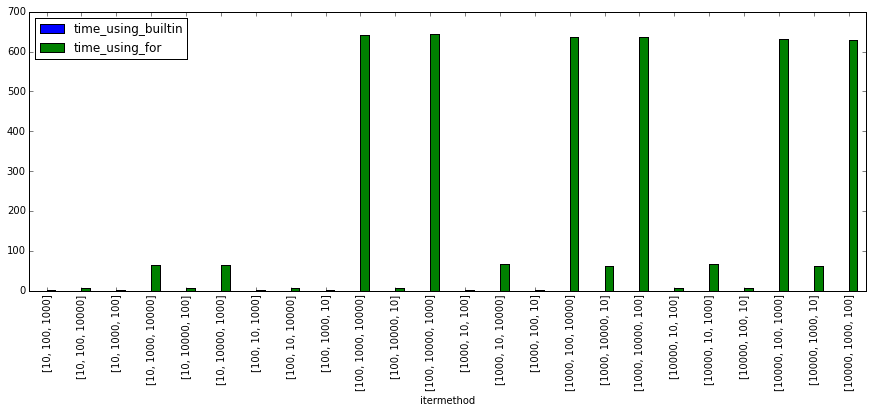

In [84]:
import time

# Redifining the above funcions without print statements. Customizing to measure the performance.

# Dot product using for loop
def using_for(A,B):
    C = []
    for i in range(i1):
        r = []
        for k in range(k1):
            sum1 = 0
            for j in range(j1):
                sum1+= int(A[i][j]*B[j][k])
            r.append(sum1)
        C.append(r)

# Dot product using the numpy builtin function
def using_builtin(A,B):    
    C = np.dot(A,B)        

# Create all possible permutations of the matrix sizes
import itertools
l= list(itertools.permutations(([10,100,1000,10000]),3))


# Measure the time taken to execute all possible iterations using method 1 - 'using for loop'
t_method1 =[]
iter_method1=[]
for i in range(len(l)):
    t1=time.time()
    a = l[i][0]
    b = l[i][1]
    c = l[i][2]
    X = np.random.uniform(size = (a,b))
    Y = np.random.uniform(size = (b,c))
    x = X.shape
    i1 = x[0]
    j1 = x[1]
    y = Y.shape
    k1 = y[1]
    using_for(X,Y)
    t2=time.time()
    t_method1.append(t2-t1)
    iter_method1.append([a,b,c])

    
# Measure the time taken to execute all possible iterations using method 2 - 'using builtin function'
t_method2 =[]
for i in range(len(l)):
    t3=time.time()
    a = l[i][0]
    b = l[i][1]
    c = l[i][2]
    X = np.random.uniform(size = (a,b))
    Y = np.random.uniform(size = (b,c))
    x = X.shape
    i1 = x[0]
    j1 = x[1]
    y = Y.shape
    k1 = y[1]
    using_builtin(X,Y)
    t4=time.time()
    t_method2.append(t4-t3)
    
# Plot the graphs of time taken by each method
import matplotlib
%matplotlib inline
import pandas as pd

data_to_plot = {'itermethod':iter_method1,
                'time_using_for': t_method1,
                'time_using_builtin': t_method2}
data_to_plot2 = pd.DataFrame(data_to_plot)

print data_to_plot2


data_to_plot2.plot(kind='bar', x = 'itermethod', figsize=(15,5))


       

**BONUS** Now repeat the past two problems but instead of computing the matrix product, compute a matrix's [determinant](http://en.wikipedia.org/wiki/Determinant).  Measure performance for matricies of various sizes and discuss the results.  Determinant may get impractical to calculate for not too huge of matricies, so no need to goto 1000x1000 matricies.

   det_using_builtin  det_using_for itermethod
0           0.588245       0.605259          8
1           5.276755       5.991673          9
2          54.182982      58.583920         10


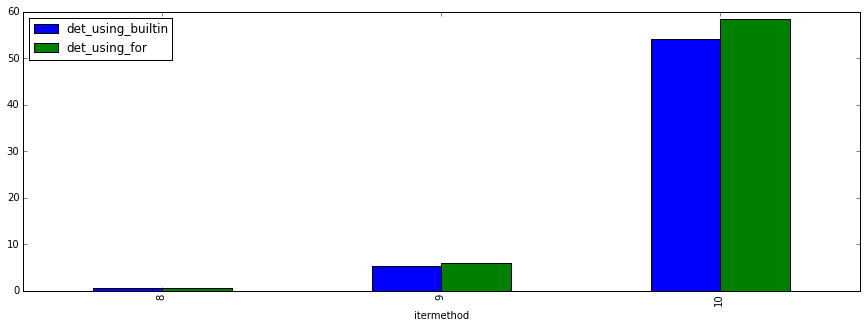

In [9]:
from copy import deepcopy
import math
import time

# Function to calculate determinant using for loop:
def det_using_for(X):
    term_list = []
    if len(X)>2: #Check if the determinant has larger than 2x2
        for j in xrange(0,len(X)):
            new_x = deepcopy(X)
            XY= np.delete(new_x,0,0) # Remove the first row
            YZ = np.delete(XY,j,1) # Remove the jth column
            multiplier = X[0][j] * math.pow(-1,(2+j)) # Calculate the multiplier
            det = det_using_for(YZ) # call det_using_for recursively to calculate det
            term_list.append(multiplier*det)
        return sum(term_list)
    else:
        return(X[0][0]*X[1][1] - X[0][1]*X[1][0])
    

# Function to calculate determinant using builtin function
def det_using_builtin(X):
    return np.linalg.det(X)


# Define size of each matrix
size = [8,9,10]

# Calculate time taken for determinant calculation using 'for loop method'
det_method1 = []
det_iter_method1 =[]
for i in size:
    t1=time.time()
    X = np.random.uniform(size = (i,i))
    det_using_for(X)
    t2=time.time()
    det_method1.append(t2-t1)
    det_iter_method1.append(str(i))
    

# Calculate the time taken for determinant calculation using 'built in function'
det_method2 = []
for i in size:
    t3=time.time()
    X = np.random.uniform(size = (i,i))
    det_using_for(X)
    t4=time.time()
    det_method2.append(t4-t3)
     
        
# Plot the graphs to show time taken using each method of determinant calculation
import matplotlib
%matplotlib inline
import pandas as pd

data_to_plot_det = {'itermethod':det_iter_method1,
                    'det_using_for': det_method1,
                    'det_using_builtin': det_method2}
data_to_plot_det2 = pd.DataFrame(data_to_plot_det)

print data_to_plot_det2

data_to_plot_det2.plot(kind='bar', x = 'itermethod', figsize=(15,5))

###IO Exercises

Below is a map of various datatypes in python that you have come across and their corresponding JSON equivalents.

$$Datatypes=\left[ \begin{array}{cc} JSON & Python3 \\ object & dictionary \\ array & list \\ string & string \\ integer	& integer \\ real number & float \\ true & True \\ false & False \\ null & None  \end{array} \right]$$


There are atleast two very important python datatypes missing in the above list. 
Can you find the same?  [list the two mising python datatypes in this markdown cell below]


### 1. Tuple
### 2. Set
### 3. Bytes
### 4. Byte array


Now We can save the above map as a dictionary with Key-value pairs 
1. create a python dictionary named dataypes, having the above map as the Key-value pairs with Python datatypes as values and JSON equivalents as keys.
2. Save it as a pickle called datatypes and gzip the same.
3. Reload this pickle, and read the file contents and output the data in the following formatted way as given in this example - "The JSON equivalent for the Python datatype Dictionary is Object". Output similarly for the rest of the key-value pairs.
4. Save this data as a JSON but using Python datatypes as keys and JSON equivalent as values this time. 

In [12]:
# Part 1 : Create python dictionary mapping JSON and Python datasets
datatypes= { 'array':'Python3', 'object' : 'dictionary' , 'array' : 'list' , 'string': 'string' ,
            'integer' : 'integer', 'real number': 'float', 'true':'True', 'false' :'False','null': 'None'}


# Part 2 : Save the file as pickle and gzip it
import pickle
import gzip
pickle.dump(datatypes,gzip.open('datatypes.pkl','wb'),0)


# Part 3: Read the file datatypes.pkl output the dictionary in a specific format
read_datatypes=pickle.load(gzip.open('datatypes.pkl','rb'))

for key, value in read_datatypes.iteritems() :
    print "The JSON equivalent for the Python datatype %s is %s"%(value,key)
    
    
# Part 4: Save the data in datatypes as a JSON but using Python datatypes as keys and JSON equivalent as values
rev_datatypes = {value: key for key, value in datatypes.items()}

import json
json.dump(rev_datatypes,open('rev_datatypes.jsn','wb'))



The JSON equivalent for the Python datatype False is false
The JSON equivalent for the Python datatype string is string
The JSON equivalent for the Python datatype float is real number
The JSON equivalent for the Python datatype dictionary is object
The JSON equivalent for the Python datatype integer is integer
The JSON equivalent for the Python datatype list is array
The JSON equivalent for the Python datatype None is null
The JSON equivalent for the Python datatype True is true


##Pandas Data Analysis
Pandas gives us a nice set of tools to work with columnar data (similar to R's dataframe). 
To learn how to use this it makes the most sense to use a real data set.
For this assignment we'll use the KDD Cup 1998 dataset, which can be sourced from http://kdd.ics.uci.edu/databases/kddcup98/kddcup98.html .


###Acquiring Data
First we pull the README file from the dataset into this notebook via the unix "curl" command.  Remember you can hide/minimize output cells via the button on the left of the output.

In [1]:
!curl http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/readme

As you can see this README describes several files which may be of use.  In particular there are two more documentation files (DOC and DIC) we should read to get an idea of the data format.  Bring these files into the notebook.

In [13]:
!curl http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/cup98doc.txt

EPSILON CONFIDENTIAL      EPSILON CONFIDENTIAL    EPSILON CONFIDENTIAL

    INFORMATION LISTED BELOW IS AVAILABLE UNDER THE TERMS OF THE  
                      CONFIDENTIALITY AGREEMENT                

EPSILON CONFIDENTIAL      EPSILON CONFIDENTIAL    EPSILON CONFIDENTIAL

+--------------------------------------------------------------------+
|                   DOCUMENTATION TO ACCOMPANY                       |
|                                                                    |
|                          KDD-CUP-98                                |
|                                                                    |
|          The Second International Knowledge Discovery and          |
|                 Data Mining Tools Competition                      |
|                                                                    |
|                Held in Conjunction with KDD-98                     |
|                                                                    |
|          The

In [14]:
!curl http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/cup98dic.txt



EPSILON CONFIDENTIAL      EPSILON CONFIDENTIAL    EPSILON CONFIDENTIAL

    INFORMATION LISTED BELOW IS AVAILABLE UNDER THE TERMS OF THE  
                      CONFIDENTIALITY AGREEMENT                

EPSILON CONFIDENTIAL      EPSILON CONFIDENTIAL    EPSILON CONFIDENTIAL

+--------------------------------------------------------------------+
|                PARALYZED VETERANS OF AMERICA (PVA)                 |
|                  DATA DICTIONARY TO ACCOMPANY                      |
|                                                                    |
|                          KDD-CUP-98                                |
|                                                                    |
|          The Second International Knowledge Discovery and          |
|                 Data Mining Tools Competition                      |
|                                                                    |
|                Held in Conjunction with KDD-98                     |
|           

Now we wish to download the cup98lrn.zip file and unzip it into a new subdirectory called "data".  
However, since this file is pretty big we don't want to store it on github.  
Luckily git provides the [.gitignore](http://git-scm.com/docs/gitignore) file which allows us to specify files we don't want to put into our git repository.

Please do the following steps:

1. Add the directory "data" to the .gitignore file
2. Commit the new .gitignore file
3. Create a new directory "data"
4. Download http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/cup98lrn.zip into the data directory
5. Unzip the cup98lrn.zip (we will only be using the unzipped version, so feel free to remove the zip file)
6. Run "git status" to show that the data directory is not an untracked file (this indicates it is ignored)

**NOTE:** These steps only need to be run once, it is advised you comment all the lines out by putting a # at the start of each line after they have run.  This will save you time in the future when you have to rerun all cells/don't want to spend a few minutes downloading the data file.

In [ ]:

# 1. Add the directory data into .gitignore file
string = 'data/**'
! echo $string > .gitignore

###### Create the .gitignore file in the location (home directory) where .git file is located

# 2. Commit the new .gitignore file
! git add .
! git commit -m "First commit"


# 3. Create a new directory /data
%cd /Users/Deepthi/Documents/DSE/dmysoren/Python Day 2/day_2_github_io_numpy_pandas/
! mkdir data
%cd data

# 4. Download files 
import urllib
url = "http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/cup98lrn.zip"
urllib.urlretrieve(url, "cup98lrn.zip")


# 5. Unzip the files and remove zip file
import zipfile
zip_ref = zipfile.ZipFile('cup98lrn.zip', 'r')
zip_ref.extractall()
zip_ref.close()

! rm cup98lrn.zip

# 6. run git status
! git status

Now perform some basic sanity checks on the data.  Using a combination of unix/basic python answer the following questions:

1. How many lines are there?  
2. Is the file character seperated or fixed width format?
3. Is there a header?  If so how many fields are in it?
4. Do all rows have the same number of fields as the header?
5. Does anyhting in 1-4 disagree with the readme file or indicate erroneous data?

In [ ]:
# 1. Count the number of lines
% cd data
! wc -l cup98lrn.txt
# Answer: There are 95,413 lines including header

# 2. Check if the file is character seperated or fixed width format
! head cup98lrn.txt
## Answer: It is a character seperated file (Comma separated)

# 3. Check if it has header and check how many fields are in it
header = ! head -1 cup98lrn.txt
print 'Yes, there is a header and the number of fields in the header =', len((str(header)).split(","))
## Answer: Yes, there is a header and the number of fields in the header = 481


# 4. Do all rows have the same number of fields as the header?

for x in range(95413):
    temp = !sed -n -e $x\p cup98lrn.txt
    i=0
    if len((str(temp)).split(",")) == len((str(header)).split(",")):
            i+=0
    else:
            i+=1
            
if i == 0:
    print "All the rows have same number of fields as header"
else:
    print "All the rows DO NOT have the same number of fields as header"

# Output: All the rows have same number of fields as header

# 5. Does anyhting in 1-4 disagree with the readme file or indicate erroneous data?
# In test 4 above, we see that the number of columns in each row is equal to the number of rows in the header. 
# However, while importing the csv file into a dataframe, an error is thrown indicating that there are more values in 
# certain rows than the number of columns. This is mainly because of bad characters(nulls).


Give answers to questions 1-4 in this markdown cell:

### 1. There are 95,413 including header
### 2. It is a character seperated file (comma separated)
### 3. Yes, the file has header and there are 481 fields
### 4. Yes, all the rows have same number of fields

Now load the data file into a pandas data frame called "learn".  To save some time, we've loaded the data dictionary into col_types.  

Finally split learn into two data frames, learn_y: the targets (two columns described in the documentation) and learn_x: the predictors (everything but the targets)

In [68]:
# dict_file = open("dict.dat")
col_types = [ (x.split("\t")[0], x.strip().split("\t")[1]) for x in dict_file.readlines() ]

# Change directory to data
%cd data

# Read the csv file cup981rn.txt into the dataframe learn
!tr < cup98lrn.txt -d '\000' > cup98lrntmp.txt
learn = pd.read_csv('cup98lrntmp.txt')
95412 rows x 481 columns

# Create learn_y with 2 columns 'TARGET_B' and 'TARGET_D' (the targets)
learn_y = learn[['TARGET_B','TARGET_D']]

# Create learn_x with all the columns in learn except 'TARGET_B' and 'TARGET_D' (the predictors)
learn_x = learn.drop(['TARGET_B','TARGET_D'], axis=1)
# 95149 rows × 479 columns


###Summarizing Data
Now that we have loaded data into the learn table, we wish to to summarize the data.  
Write a function called summary which takes a pandas data frame and prints a summary of each column containing the following:

If the column is numeric:

1. Mean
2. Standard Deviation
3. Min/Max
4. Number of missing values (NaN, Inf, NA)

If the column is non alphabetical:

1. Number of distinct values
2. Number of missing values (NaN, INF, NA, blank/all spaces)
3. The frequency of the 3 most common values and 3 least common values

Format the output to be human readable.

For example:
> Field_1  
> mean: 50  
> std_dev: 25  
> min: 0  
> max: 100  
> missing: 5
>  
> Field_2  
> distinct_values: 100  
> missing: 10  
>  
> 3 most common:  
>   the: 1000  
>   cat: 950  
>   meows: 900  
>  
> 3 least common:  
>   dogs: 5  
>   lizards: 4  
>   eggs: 1  

In [104]:
# Create a dictionary of column names and types
col_types_dict = dict((x,y) for x,y in col_types)

# Get a list of numeric columns
num_col = []
for k,v in col_types_dict.iteritems():
    if v == 'Num':
        num_col.append(k)

# Summary function
def summary(df, nc): #df = dataframe, nc = numeric columns
    df_num = df[nc]
    for i in list(df_num): # Filter for numeric columns and output the corresponding statistics
        print 'Field name:', i ,'\n', 'Mean:' , df_num[i].mean(),'\n', 'StD:' , df_num[i].std(),'\n', 'Min:' , df_num[i].min(),'\n', 'Max:' , df_num[i].max(),'\n', 'Missing:' , df_num[i].isnull().sum(), '\n'
    df_alpha = df.drop(nc,axis=1)
    for j in list(df_alpha): # Filter for characters and output the corresponding statistics
        print df_alpha[j].nunique()
        print 'Field name:', j , '\n', 'No. Distinct values: ', df_alpha[j].nunique() ,'\n' , 'Freq of 3 most common values:','\n' , df_alpha[j].value_counts().head(3) , '\n', 'Freq of 3 least common values: ','\n' , df_alpha[j].value_counts().tail(3),'\n'
        
        
summary(learn, num_col)




Field name: AGE 
Mean: 61.6109123935 
StD: 16.6620971485 
Min: 1.0 
Max: 98.0 
Missing: 23579 

Field name: ANC12 
Mean: 0.396441370902 
StD: 1.42566705023 
Min: 0 
Max: 52 
Missing: 0 

Field name: ANC13 
Mean: 0.727805862384 
StD: 0.97781678099 
Min: 0 
Max: 50 
Missing: 0 

Field name: ANC10 
Mean: 1.33508497199 
StD: 2.88465986134 
Min: 0 
Max: 99 
Missing: 0 

Field name: ANC11 
Mean: 0.16818884066 
StD: 0.867156174412 
Min: 0 
Max: 43 
Missing: 0 

Field name: ANC14 
Mean: 0.727816372216 
StD: 1.26464593616 
Min: 0 
Max: 27 
Missing: 0 

Field name: ANC15 
Mean: 0.0783402873388 
StD: 0.388434388818 
Min: 0 
Max: 32 
Missing: 0 

Field name: PUBCULIN 
Mean: 0.145339392084 
StD: 0.428044806853 
Min: 0.0 
Max: 6.0 
Missing: 52676 

Field name: MAXADATE 
Mean: 9701.63133611 
StD: 5.75275683566 
Min: 9608 
Max: 9702 
Missing: 0 

Field name: RDATE_23 
Mean: 9409.34863555 
StD: 11.6046489767 
Min: 9309.0 
Max: 9507.0 
Missing: 87307 

Field name: RDATE_22 
Mean: 9413.60830932 
StD: 18.

MBC    4525
SYN    3551
AML    3425
dtype: int64

 ### Pandas analysis on Calit2 data 

Import data from http://archive.ics.uci.edu/ml/machine-learning-databases/event-detection/CalIt2.data using curl

This data comes from the main door of the CalIt2 building at UCI. Observations come from 2 data streams (people flow in and out of the building), over 15 weeks, 48 time slices per day (half hour count aggregates).

Attribute Information:
1. Flow ID: 7 is out flow, 9 is in flow
2. Date: MM/DD/YY
3. Time: HH:MM:SS
4. Count: Number of counts reported for the previous half hour


In [6]:
import numpy as np
import pandas as pd

%cd /Users/Deepthi/Documents/DSE/dmysoren/Python Day 2/day_2_github_io_numpy_pandas/

!curl -O http://archive.ics.uci.edu/ml/machine-learning-databases/event-detection/CalIt2.data

df = pd.read_csv('CalIt2.data',names=['flow_id','date','time','count'])

df


/Users/Deepthi/Documents/DSE/dmysoren/Python Day 2/day_2_github_io_numpy_pandas
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  218k  100  218k    0     0   267k      0 --:--:-- --:--:-- --:--:--  267k


,flow_id,date,time,count
0,7,07/24/05,00:00:00,0
1,9,07/24/05,00:00:00,0
2,7,07/24/05,00:30:00,1
3,9,07/24/05,00:30:00,0
4,7,07/24/05,01:00:00,0
5,9,07/24/05,01:00:00,0
6,7,07/24/05,01:30:00,0
7,9,07/24/05,01:30:00,0
8,7,07/24/05,02:00:00,0
9,9,07/24/05,02:00:00,0


#### Selecting Data ####
1. Select all data for the date July 24 2005 having flow id=7. Also output the row count of results 
2. Select all rows whose count is greater than 5. Sort the result on count in descending order and output the top 10 rows

In [7]:
#1. Select all data for the date July 24 2005 having flow_id = 7. Also output the row count of results

mask = df['date'] == '07/24/05'
mask2 = df['flow_id'] == 7
df1=df[mask]

df1=df1[mask2]

print df1.flow_id.count()

# row count = 48


#2. Select all rows whose count is greater than 5. Sort the result on count in descending order and output the top 10 rows

mask3 = df['count'] > 5
df2 = df[mask3]

sortdf = df2.sort('count',ascending = [False]) 
top_10 = sortdf.head(10)
print top_10

48
      flow_id      date      time  count
6879        9  10/03/05  15:30:00     62
335         9  07/27/05  11:30:00     61
6881        9  10/03/05  16:00:00     55
9686        7  11/01/05  21:30:00     54
9682        7  11/01/05  20:30:00     54
9681        9  11/01/05  20:00:00     53
6878        7  10/03/05  15:30:00     52
9933        9  11/04/05  11:00:00     50
8913        9  10/24/05  20:00:00     50
3615        9  08/30/05  15:30:00     50


/Users/Deepthi/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


#### Apply function ####
1. For the 10 rows outputted above, use Pandas Apply function to subtract lowest value of the 10 from all of them and then output the average value of the resulting counts
2. On the entire data, use apply function to sum all counts with flow_id=9 and date is 07/24/05

In [8]:
# 1. For the 10 rows outputted above, use Pandas Apply function to subtract lowest value of the 10 from all of them and then output the average value of the resulting counts

top_10['count']= top_10['count'].apply(lambda x: (x - top_10['count'].min()))
print top_10['count'].mean()

# Average = 4.1


# 2.On the entire data, use apply function to sum all counts with flow_id=9 and date is 07/24/05

df[(df['flow_id']== 9) & (df['date'] == '07/24/05')].apply(np.sum)['count']

# Sum of counts = 16   



4.1


/Users/Deepthi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


16

#### Indexing an Selecting ####
Exlain the following

### 1. loc: loc can be used for label based slicing
### 2. iloc: iloc can be used for location based slicing
### 3. ix: ix can be used as both label based and location based slicing. (Primarily label based)
### 4. at: functions similar to loc but faster
### 5. iat: functions similar to iloc but faster

Highlight the differences by providing usecases where one is more useful than the other

### Answers:
### 'loc' is very useful while accessing a random row/column in the dataframe. iloc is an efficient way of accessing the rows/coulumns of data sequentially. 

### 'ix' can be used for both label based and location based slicing. 'ix' can be beneficial in cases where we need to access a dataframe randomly as well as sequentially. However, in cases where an axis is integer based, only label based access and not positional access is supported. So in such cases, explicit usage of 'loc' or 'iloc' is beneficial

### at and iat have similar functionality as that of loc and iloc. But can be helpful if a scalar value needs to be accessed quickly without any overhead of loc and iloc



Write a function to take two dates as input and return all flow ids and counts in that date range having both the dates inclusive. You can use pandas to_datetime function to convert the date to pandas datetime format 

In [76]:
import datetime
from datetime import datetime

# Input date range
in_date1 = '2005-07-24'
in_date2 = '2005-07-25'

def dt_rnge(x,y):
    if y<x:
        print "Please input in_date1 < in_date2"
    else:
        df['date2'] = pd.to_datetime(df.date,'%m/%d/%y')
        return df[(df.date2 >= x) & (df.date2 <= y)][['flow_id','count','date2']]

dt_rnge(in_date1, in_date2)



,flow_id,count,date2
0,7,0,2005-07-24
1,9,0,2005-07-24
2,7,1,2005-07-24
3,9,0,2005-07-24
4,7,0,2005-07-24
5,9,0,2005-07-24
6,7,0,2005-07-24
7,9,0,2005-07-24
8,7,0,2005-07-24
9,9,0,2005-07-24


#### Grouping ####
1. Select data in the month of August 2005 having flow id=7
2. Group the data based on date and get the max count per date

In [10]:
import datetime
from datetime import datetime


# 1. Select data in the month of August 2005 having flow id=7

df_aug_2005 = df[(df['date2'].dt.year == 2005) & (df['date2'].dt.month == 8) & (df['flow_id'] == 7)]


# 2. Group the data based on date and get the max count per date

df_aug_2005.groupby('date2').apply(np.max)['count']



date2
2005-08-01    18
2005-08-02    16
2005-08-03    26
2005-08-04    40
2005-08-05    17
2005-08-06     8
2005-08-07     3
2005-08-08    16
2005-08-09    19
2005-08-10    25
2005-08-11    16
2005-08-12    21
2005-08-13     5
2005-08-14     3
2005-08-15    17
2005-08-16    24
2005-08-17    22
2005-08-18    39
2005-08-19    23
2005-08-20     3
2005-08-21     4
2005-08-22    23
2005-08-23    25
2005-08-24    17
2005-08-25    24
2005-08-26    22
2005-08-27     3
2005-08-28     7
2005-08-29    15
2005-08-30    47
2005-08-31    19
Name: count, dtype: int64

#### Stacking, Unstacking ####
1. Stack the data with count and flow_id as indexes
2. Use reset_index to reset the stacked hierarchy by 1 level. The index then will just be the counts
3. Unstack the data to get back original data

In [77]:

# 1. Stack the data with count and flow_id as indexes
index_df = df.set_index(['count', 'flow_id']).stack()
print index_df

# 2. Use reset_index to reset the stacked hierarchy by 1 level. The index then will just be the counts
print index_df.reset_index(1)


# Stopping at reset_index() part as per email discussion

# 3. Unstack the data to get back original data 
# unstack_df = index_df.reset_index().unstack()
# Note: This dataset cannot be unstacked as the index contains duplicate entries.


count  flow_id       
0      7        date    2005-07-24 00:00:00
                time    2015-10-24 00:00:00
                date2   2005-07-24 00:00:00
       9        date    2005-07-24 00:00:00
                time    2015-10-24 00:00:00
                date2   2005-07-24 00:00:00
1      7        date    2005-07-24 00:00:00
                time    2015-10-24 00:30:00
                date2   2005-07-24 00:00:00
0      9        date    2005-07-24 00:00:00
                time    2015-10-24 00:30:00
                date2   2005-07-24 00:00:00
       7        date    2005-07-24 00:00:00
                time    2015-10-24 01:00:00
                date2   2005-07-24 00:00:00
       9        date    2005-07-24 00:00:00
                time    2015-10-24 01:00:00
                date2   2005-07-24 00:00:00
       7        date    2005-07-24 00:00:00
                time    2015-10-24 01:30:00
                date2   2005-07-24 00:00:00
       9        date    2005-07-24 00:00:00
          

#### Pandas and Matplotlib

Plot a histogram of date vs total counts for flow_id=7 and flow_id=9 for the month of July 2005

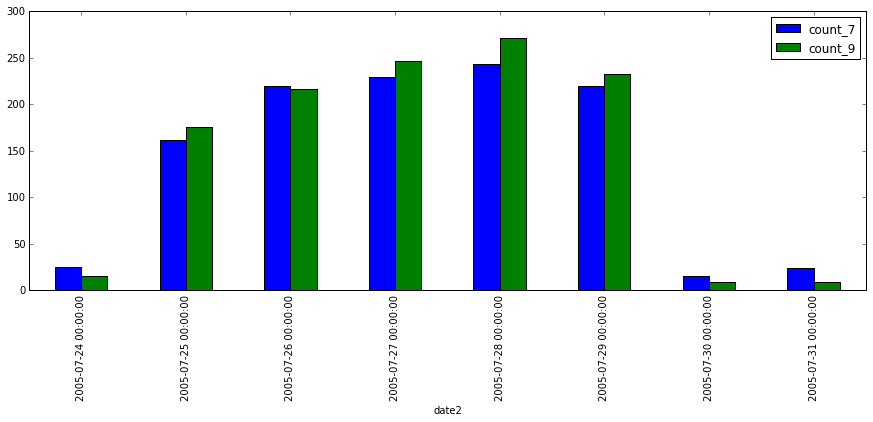

In [90]:
# Create a dataframe with flow_id = 7 for the month of July 2005
df_plt_7 = df[(df['date2'].dt.year == 2005) & (df['date2'].dt.month == 7) & (df['flow_id'] == 7)].groupby('date2').apply(np.sum)['count']
df_plt_7_1 = df_plt_7.to_frame().rename(columns = {'count':'count_7'})

# Create a dataframe with flow_id = 9 for the month of July 2005
df_plt_9 = df[(df['date2'].dt.year == 2005) & (df['date2'].dt.month == 7) & (df['flow_id'] == 9)].groupby('date2').apply(np.sum)['count']
df_plt_9_1 = df_plt_9.to_frame().rename(columns = {'count':'count_9'})

# Merge the two dataframes
df_plt = pd.concat([df_plt_7_1, df_plt_9_1], axis=1, join='inner')


import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the bar chart
df_plt.plot(kind = 'bar', figsize=(15,5))
